# **1. Machine Learning Implementation (Isolation Forest)**

**Description :**

# **Phase 2: AI Model Building for Anomaly Detection**

**Objective:** In this phase, we implement an Unsupervised Machine Learning model to detect Grey Market activity.

**Algorithm Choice:** We use Isolation Forest. Unlike traditional clustering, it works by isolating anomalies. Since grey market transactions are "outliers" (abnormal prices, unusual volumes), they are easier to isolate and require fewer "splits" in the decision tree structure.

**Features for the Model:**

1.  **Price_Variance_Index (PVI)** : Primary indicator of unauthorized discounting.
2.  **Quantity**: To detect wholesale leakage.

3. **UnitPrice**: To maintain the context of the product's value.


In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df_ml = pd.read_csv("preprocessed_retail_data.csv")

features = ['PVI', 'Quantity', 'UnitPrice']
X = df_ml[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

df_ml['Anomaly_Label'] = model.fit_predict(X_scaled)

scores = model.decision_function(X_scaled)
df_ml['Risk_Score'] = (1 - (scores - scores.min()) / (scores.max() - scores.min())) * 100

print("AI Model Training Complete.")
print(f"Detected {len(df_ml[df_ml['Anomaly_Label'] == -1])} suspicious transactions.")

AI Model Training Complete.
Detected 2761 suspicious transactions.


# **2. Risk Categorization for BI Analysis**

**Description** :

**2.1. Defining Actionable Risk Levels**

To make the ML output useful for a Business Intelligence (BI) Dashboard, we categorize the Risk_Score into three levels: **High**, **Medium**, and **Low**.

**High Risk (Score > 80):** Immediate investigation required (likely illegal/parallel import).

**Medium Risk (Score 50-80):** Potential grey market activity or bulk discount.

**Low Risk (Score < 50):** Standard authorized transaction.

In [3]:
def categorize_risk(score):
    if score > 80: return 'High Risk'
    elif score > 50: return 'Medium Risk'
    else: return 'Low Risk'

df_ml['Risk_Category'] = df_ml['Risk_Score'].apply(categorize_risk)

df_ml.to_csv("final_risk_analysis_results.csv", index=False)

df_ml[df_ml['Risk_Category'] == 'High Risk'][['Description', 'Country', 'PVI', 'Risk_Score']].head(10)

,Description,Country,PVI,Risk_Score
102,RED CHARLIE+LOLA PERSONAL DOORSIGN,United Kingdom,-0.871186,82.207229
166,SET 3 WICKER OVAL BASKETS W LIDS,United Kingdom,1.509434,85.482227
176,CHILLI LIGHTS,United Kingdom,-0.228283,80.211076
179,FAIRY TALE COTTAGE NIGHTLIGHT,United Kingdom,-0.256410,85.814641
180,RED TOADSTOOL LED NIGHT LIGHT,United Kingdom,-0.242424,85.016853
217,DISCO BALL CHRISTMAS DECORATION,United Kingdom,-0.166667,83.508454
237,RUSTIC SEVENTEEN DRAWER SIDEBOARD,United Kingdom,0.000000,80.016268
720,NAMASTE SWAGAT INCENSE,United Kingdom,-0.200000,87.018017
860,BLACK RECORD COVER FRAME,United Kingdom,-0.096000,84.962106
1189,SET 3 WICKER OVAL BASKETS W LIDS,United Kingdom,1.509434,85.482227


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PVI'].plot(kind='hist', bins=20, title='PVI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Risk_Score'].plot(kind='hist', bins=20, title='Risk_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='PVI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PVI', y='Risk_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['PVI']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('PVI')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Risk_Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Risk_Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PVI'].plot(kind='line', figsize=(8, 4), title='PVI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Risk_Score'].plot(kind='line', figsize=(8, 4), title='Risk_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

# **3. Finalizing the "Actionable Insights"**

**Description :**

# **Phase 3: Business Recommendations & Impact Analysis**

**Objective:** Translating ML results into business strategy. We identify the specific products and regions that require immediate legal or supply-chain intervention.

In [4]:
print("--- FINAL PROJECT SUMMARY ---")

total_risk = df_ml[df_ml['Risk_Category'] == 'High Risk']['Revenue_At_Risk'].sum()
print(f"Total Potential Revenue Leakage: ${total_risk:,.2f}")

top_risk_country = df_ml.groupby('Country')['Risk_Score'].mean().idxmax()
print(f"Highest Risk Market (Avg Risk Score): {top_risk_country}")

targeted_product = df_ml[df_ml['Risk_Category'] == 'High Risk'].groupby('Description').size().idxmax()
print(f"Product most targeted by Grey Market: {targeted_product}")

print("\n--- STRATEGIC RECOMMENDATIONS ---")
print("1. Region Lockdown: Investigate authorized distributors in " + top_risk_country + " for supply chain leakage.")
print("2. Product Guard: Implement unique serial number tracking for " + targeted_product + ".")
print("3. Dynamic Pricing: Align MSRPs across high-leakage borders to reduce 'Geographic Arbitrage'.")

--- FINAL PROJECT SUMMARY ---
Total Potential Revenue Leakage: $41,264.39
Highest Risk Market (Avg Risk Score): Finland
Product most targeted by Grey Market: POSTAGE

--- STRATEGIC RECOMMENDATIONS ---
1. Region Lockdown: Investigate authorized distributors in Finland for supply chain leakage.
2. Product Guard: Implement unique serial number tracking for POSTAGE.
3. Dynamic Pricing: Align MSRPs across high-leakage borders to reduce 'Geographic Arbitrage'.


# **4. Model Persistence: Training and Saving the AI**
**Description :**

**4.1. The Training Process vs. Neural Networks**
Unlike Deep Learning, Isolation Forest is a tree-based ensemble. It does not use "Epochs" because it doesn't need to loop over the data multiple times to converge. Instead, it builds 100+ "Isolation Trees" in a single pass (Fit).

Once trained, we **persist (save)** the model to a file. This is crucial for Round 4 because it proves our solution is ready for production—we can "export" the brain of our AI and use it in other applications without retraining.

In [5]:
import joblib

print("Training the Isolation Forest Model...")
iso_model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_model.fit(X_scaled)

model_filename = "grey_market_detector_v1.joblib"
joblib.dump(iso_model, model_filename)
print(f"Model saved successfully as {model_filename}")

loaded_model = joblib.load(model_filename)
print("Model loaded back into memory for testing.")

test_predictions = loaded_model.predict(X_scaled[:5])
print(f"Sample Predictions (1=Normal, -1=Suspicious): {test_predictions}")

Training the Isolation Forest Model...
Model saved successfully as grey_market_detector_v1.joblib
Model loaded back into memory for testing.
Sample Predictions (1=Normal, -1=Suspicious): [1 1 1 1 1]


# **5. Model Evaluation: Interpreting the "Black Box"**

**Description :**

**5.1. Evaluating Anomaly Distribution**

Since this is unsupervised learning, we don't have "Accuracy" in the traditional sense. Instead, we evaluate the Decision Function. This function returns a score where lower, more negative values indicate a higher probability of being an anomaly.

We will now visualize the "Score Distribution" to find the threshold where "Normal" ends and "Grey Market" begins.

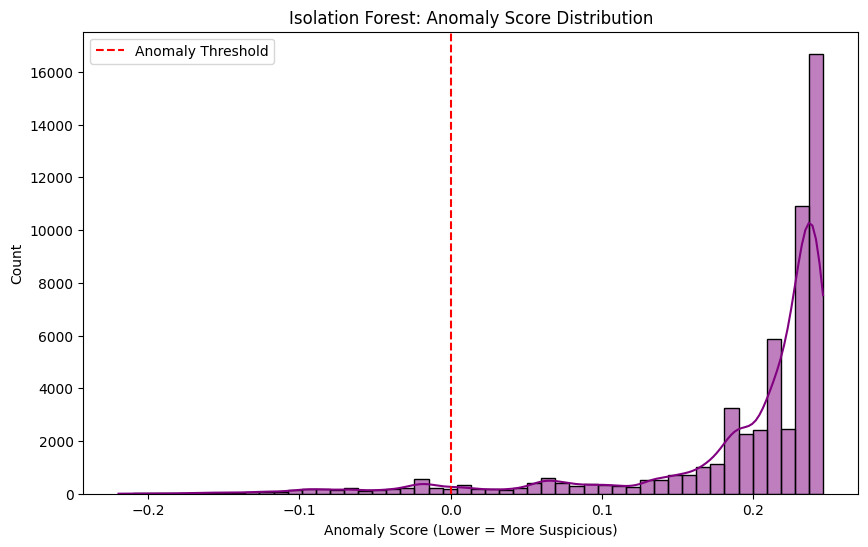

--- TOP 5 SUSPICIOUS GREY MARKET LEADS ---
                    Description         Country  UnitPrice  Quantity  \
46829  LOVE HEART POCKET WARMER  United Kingdom       0.42     900.0   
9167                     MANUAL  United Kingdom      35.00       1.0   
10793   CREAM HEART CARD HOLDER  United Kingdom       2.31    1008.0   
10794   BLACK HEART CARD HOLDER  United Kingdom       2.31    1008.0   
10786   BLACK HEART CARD HOLDER  United Kingdom       2.31     972.0   

             PVI  Raw_Anomaly_Score  
46829  -0.710345          -0.219562  
9167   27.000000          -0.208124  
10793  -0.415190          -0.205395  
10794  -0.415190          -0.205395  
10786  -0.415190          -0.204330  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# decision_function: Lower scores = More abnormal
raw_scores = loaded_model.decision_function(X_scaled)

plt.figure(figsize=(10, 6))
sns.histplot(raw_scores, bins=50, kde=True, color='purple')
plt.axvline(x=0, color='r', linestyle='--', label='Anomaly Threshold')
plt.title("Isolation Forest: Anomaly Score Distribution")
plt.xlabel("Anomaly Score (Lower = More Suspicious)")
plt.legend()
plt.show()

df_ml['Raw_Anomaly_Score'] = raw_scores
top_anomalies = df_ml.sort_values(by='Raw_Anomaly_Score').head(5)

print("--- TOP 5 SUSPICIOUS GREY MARKET LEADS ---")
print(top_anomalies[['Description', 'Country', 'UnitPrice', 'Quantity', 'PVI', 'Raw_Anomaly_Score']])

**Refining the Evaluation Metrics**

In [7]:
actual_contamination = (df_ml['Anomaly_Label'] == -1).sum() / len(df_ml)
print(f"Model-Identified Contamination Rate: {actual_contamination:.2%}")

profile = df_ml.groupby('Risk_Category')[['PVI', 'Quantity']].mean()
print("\n--- Technical Risk Profiles ---")
print(profile)

Model-Identified Contamination Rate: 5.00%

--- Technical Risk Profiles ---
                    PVI    Quantity
Risk_Category                      
High Risk      0.559866  383.942966
Low Risk      -0.003342    8.143986
Medium Risk    0.185161   82.069889


**Colab: The Real-Time Simulator**

In [11]:
# @title 🔍 Real-Time Grey Market Detector
# @markdown Enter transaction details to see if the AI flags it as "Suspicious."

Product_Description = "MEDIUM CERAMIC TOP STORAGE JAR" #@param {type:"string"}
Unit_Price = 0.45 #@param {type:"number"}
Quantity = 1200 #@param {type:"integer"}
MSRP_Baseline = 1.25 #@param {type:"number"}

pvi = (Unit_Price - MSRP_Baseline) / MSRP_Baseline

import numpy as np
import joblib
import pandas as pd

model = joblib.load("grey_market_detector_v1.joblib")

input_df = pd.DataFrame([[pvi, Quantity, Unit_Price]], columns=features)
input_scaled = scaler.transform(input_df)

prediction = model.predict(input_scaled)
risk_score = model.decision_function(input_scaled)

print("\n" + "=" * 40)
if prediction[0] == -1:
    print(f"🚨 ALERT: SUSPICIOUS GREY MARKET ACTIVITY DETECTED! 🚨")
    print(f"Product: '{Product_Description}'")
    print(f"Reason: Deep Discount ({pvi:.1%}) with High Volume ({Quantity}).")
    print(f"Risk Score: {risk_score[0]:.2f}")
else:
    print(f"✅ Transaction for '{Product_Description}' appears NORMAL. ✅")
    print(f"Risk Score: {risk_score[0]:.2f}")
print("=" * 40 + "\n")


🚨 ALERT: SUSPICIOUS GREY MARKET ACTIVITY DETECTED! 🚨
Product: 'MEDIUM CERAMIC TOP STORAGE JAR'
Reason: Deep Discount (-64.0%) with High Volume (1200).
Risk Score: -0.22

